In [32]:
#http://cs231n.github.io/classification/
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt
#from stackoverflow to calculate the running time of the execution of certain parts of the code
import time

In [33]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# Load the raw CIFAR-10 data.
cifar10_dir ="/Users/Naufal/Documents/ML Files/cifar-10-batches-py"
X_train_db, y_train_db, X_test, y_test = load_CIFAR10(cifar10_dir)

In [35]:
# As a sanity check, we print out the size of the training and test data.
print ('Training data shape:, training data type ', X_train_db.shape, type(X_train_db))
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Training data shape:, training data type  (50000, 32, 32, 3) <class 'numpy.ndarray'>
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


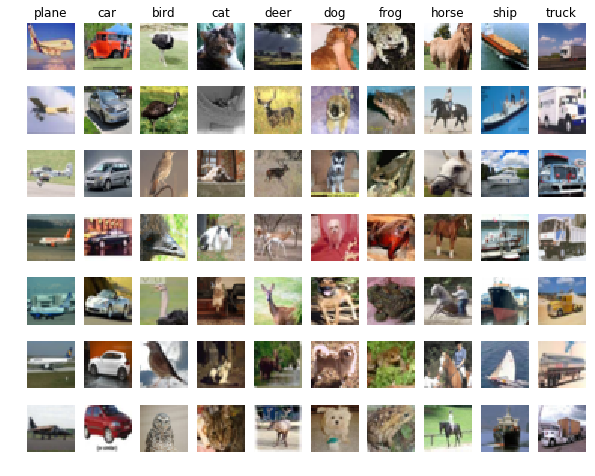

In [38]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train_db[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [44]:
# Subsample the data for more efficient code execution in this exercise
num_training = 8000
mask = range(num_training)
X_train = X_train_db[mask]
y_train = y_train_db[mask] 

num_test = 10000
mask = range(num_training,num_test)
X_test = X_train_db[mask]
y_test = y_train_db[mask]

In [45]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print (X_train.shape, X_test.shape)

(8000, 3072) (2000, 3072)


In [46]:
import NearestNeighbor as NN
# Create a NN classifier instance and train it with training data
classifier = NN.NearestNeighbor()
classifier.train(X_train, y_train)

In [ ]:
start_time = time.time()
# Predict the labels of testing data
k = 20
y_test_pred = classifier.predict(X_test,'L2',k)
print("---- %s minutes ----" % ((time.time()- start_time)/60))# Compute and print the fraction of correctly predicted examples
start_time = time.time()
num_correct = np.sum(y_test_pred == y_test)
print("---- %s seconds ----" % (time.time()- start_time))
start_time = time.time()
accuracy = float(num_correct) / (num_test - num_training)
print ('Got %d / %d correct => accuracy: %f' % (num_correct, num_test - num_training, accuracy))
print("---- %s minutes ----" % ((time.time()- start_time)/60))